<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/ValoresExtremos_y_MagnitudVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valores Extremos

$\bullet$ Un valor atípico (outlier) es un punto extremo, o significativamente diferente del resto de los datos.

**Se debería remover los outliers?**

Dependiendo del contexto, los valores extremos requieren ya sea un tratamiento especial o ser ignorados completamente. Por ejemplo para las predicciones de ingresos: si se observan picos inusuales de ingresos, es probablemente una buena idea prestarles atención y entender las causas de los picos. De la misma forma, una transacción atípica en una tarjeta de crédito, puede ser una señal de actividad fraudulenta, que la entidad crediticia desea prevenir. En estos casos, es una buena idea, mirar e investigar en más detalle los valores atípicos.

Si estos valores extremos, son introducidos por un error mecánico, error en la toma de los datos o alguna otra razón que no puede generalizarse, es una buena idea eliminar estos valores antes de usarlos para entrenar un modelo. ¿Por qué? Porque algunos algoritmos son muy sensibles a estos valores extremos.


**Cuáles modelos de  machine learning susceptibles a los valores atípicos?**

Algunos modelos de machine learning son más susceptibles a los valores extremos que otros. 
Por ejemplo, los **modelos basados en  árboles de decisión como los Random Forests o los Bosque Aleatorios y las máquinas de potenciación del gradiente**, tienden a lidiar mejor con los valores atípicos.

Los **árboles de decisión tienden a ignorar la presencia de valores extremos** cuando crean las ramificaciones. Típicamente, un árbol toma decisiones evaluando si una variable es mayor o igual a cierto umbral  **(x >= umbral)**. Un valor extremo simplemente queda en algún lado de la ramificación, por lo tanto será tratado igual que cualquier otro valor, sin importar su magnitud. 
**AdaBoost** por el contrario, puede poner mayor pesos a los valores atípicos, generando un sobre-ajuste a los dato de entrenamiento, y por lo tanto mala generalización. 

Contrariamente, **las regresiones lineales, las regresiones logísticas, y los modelos de aglomeramiento con  k-means** son susceptibles a los valores extremos.

Un artículo de investigación recientemente publicado sugiere que la **Redes Neuronales** también son susceptibles a los valores extremos, siempre y cuando su magnitud y desviación sean considerablemente altos. Sin embargo, si el número de valores extremos es alto (>15% como se sugiere en el artículo) podría argumentarse que ya no son valores atípicos, sino más bien una representación fehaciente de una variable. Encontrarás una referencia a este artículo en los "Recursos Adicionales de Lectura" al final de esta sección.

**Cómo se pueden identificar los valores atípicos?**

El análisis de valores atípicos y la detección de anomalías es un gran campo de investigación enfocado en optimizar métodos y crear nuevos algoritmos para detectar confiablemente dichos valores. En general, lo que buscan es identificar las observaciones con valores atípicos, ya que por ejemplo, son de alto interés, como es el caso de actividad fraudulenta de las tarjetas de crédito. Estas técnicas están fuera del enfoque de este curso.

En este curso, nos enfocaremos en identificar los valores extremos introducidos por errores mecánicos o errores en la toma de los datos. Estos valores atípicos son de hecho, casos raros en la muestra y por lo tanto pueden ser ignorados/eliminados. En esta sección veremos cómo identificar outliers, así en las siguientes secciones del curso, podemos pre-procesar las variables que contengan valores atípicos para entrenar modelos de machine learning.


**Análisis de valores extremos**

La forma más básica para la detección de valores atípicos es el **Análisis de valores extremos**. La clave de este método es determinar los valores al final de las colas de la distribución estadística de una variable.

Si la **variable está normalmente distribuida (Gaussiana)**, **los valores que caen por fuera de la media más o menos 3 veces la desviación estándar** de la variable son considerados valores atípicos o extremos.

$\bullet$ valores atípicos o extremos = media +/- 3*std

Si la variable tiene una **distribución sesgada**, el enfoque general es **calcular los cuantiles, y luego los rangos entre-cuantiles** (IQR por sus siglas en inglés inter-quantile range):

$\bullet$ IQR = 75vo cuantil – 25vo cuantil

**Un valor atípico suele estar por fuera de los siguientes límites inferior y superior:**

$\bullet$ Límite superior = 75vo cuantil + (IQR * 1.5)

$\bullet$ Límite inferior = 25vo cuantil - (IQR * 1.5)

**y para los casos extremos:**

$\bullet$ Límite superior = 75vo cuantil + (IQR * 3)

$\bullet$ Límite inferior = 25vo cuantil - (IQR * 3)



## Datos : 

Usaremos los datos de ventas de casas y los del Titanic.


También usaremos los datos del Boston house prices, incluidos en Scikit-learn


### Datos: Boston house prices:



In [1]:
# Imprimir información de los datos del Boston
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Própositos**:

- Identificar los valores atípicos usando el Análisis de valores extremos en variables normalmente distribuidas.
- Identificar outliers usando análisis de valores extremos en variables sesgadas.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#  Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset 
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# cargar boston dataset de sklearn
boston_dataset = load_boston()

# crear dataframe con las variables independientes
# Usaremos solamente 3 de las varaibles para el demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]


boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [5]:
# cargar titanic dataset
titanic = pd.read_csv('/content/drive/My Drive/datasets/titanic.csv',
                      usecols=['age', 'fare'])


In [6]:
# las variables age y fare tienen valores faltantes,
# los eliminaremos para el demo
titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## Cómo identificar outliers en las variables?

En **variables normalmente distribuidas**, los valores atípicos **son los valores que están por fuera de la media más o menos tres veces la desviación estándar**. Si la **variable esta sesgada**, los valores atípicos **se encuentran usando el rango entre-cuartil**. Para decidir cuál método utilizar para detectar los valores atípicos, es necesario saber cual es la distribución de los valores de la variable.

Para esto se pueden usar gráficos Q-Q y determinar si la variable está normalmente distribuida.  Tambien se usan Boxplots (diagramas de caja) para analizar la distribución de una variable. Estos últimos son de hecho una herramienta que permite visualizar directamente los valores extremos, así como el primer y tercer cuartil, la mediana, y el grado de asimetría.

Del diagrama de caja se puede fácilmente identificar:

$\bullet$ Dentro de la caja una línea que indica la mediana (segundo cuartil, Q2)

$\bullet$ Un rectángulo (caja) que indica el rango entre-cuartil delimitado por el primer y tercer cuartil (Q1 y Q3). 

$\bullet$ Dos brazos o bigotes, uno que empieza en el primer cuartil y acaba en el límite inferior, y otro que empieza en el tercer cuartil y acaba en el límite superior.

$\bullet$ Los datos atípicos (o valores extremos) que son los valores por fuera de los brazos.



In [7]:
# función para crear un histograma, un gráfico Q-Q plot y un boxplot


def diagnostic_plots(df, variable):
    # la función toma como argumentos un dataframe (df) y
    # la variable a visualizar

    # tamaño gráfica
    plt.figure(figsize=(16, 4))

    # histograma
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # gráfica Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # diagrama de caja
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Variable normalmente distribuidas

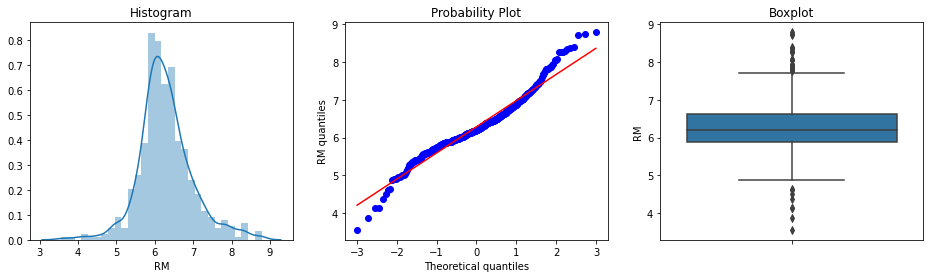

In [8]:
# empecemos con la variable RM del
# boston house dataset.
# RM es el número promedio de habitaciones por vivienda

diagnostic_plots(boston, 'RM')

Del histograma y la gráfica Q-Q, podemos ver que la variable RM tiene una distribución aproximadamente Gaussiana. En el gráfico de caja, vemos que hay algunos valores extremos que son los puntos que están por fuera de los brazos, en ambas colas de la distribución.


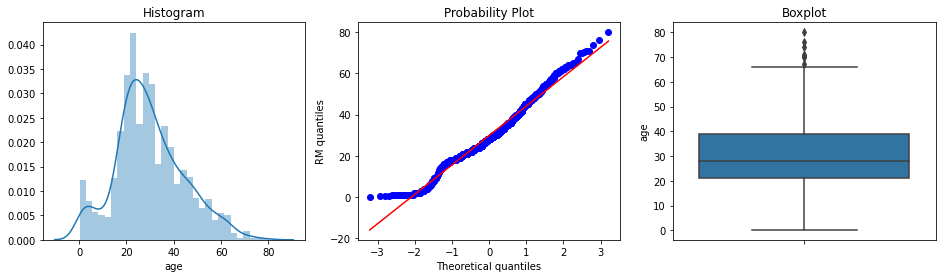

In [9]:
# Exploremos la variable age del titanic
# edad de los pasajeros a bordo del titanic

diagnostic_plots(titanic, 'age')

Del histograma y la gráfica Q-Q, podemos ver que la distribución de la variable se aproxima a la Gaussiana. Hay una desviación en los valores de menos de edad. En la gráfica de caja, podemos ver que la variable tiene algunos valores extremos por fuera de los brazos de la gráfica (a la derecha de la distribución - extremo superior del boxplot).

### Variables Sesgadas

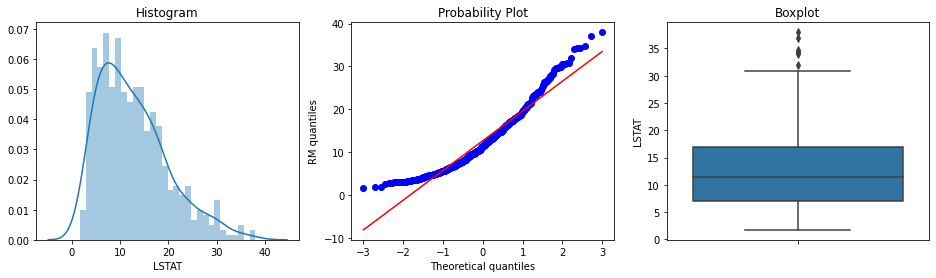

In [10]:
# variable LSTAT del boston house dataset

diagnostic_plots(boston, 'LSTAT')

LSTAT no está normalmente distribuida, de hecho vemos que está sesgada con una cola hacia la derecha. Según el gráfico de caja, hay algunos valores extremos en la cola derecha de la variable.


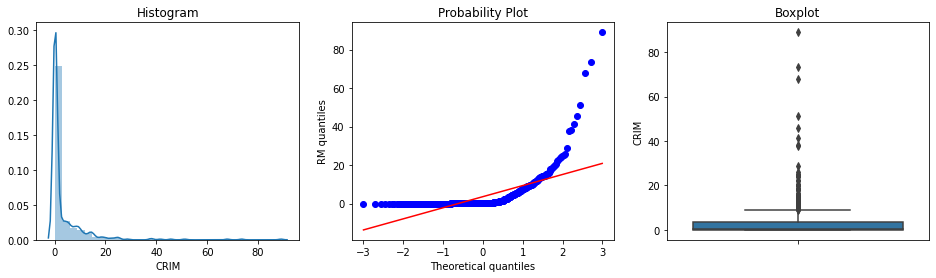

In [11]:
# variable CRIM del boston house dataset
# CRIM es la tasa de crimem per capita por ciudad

diagnostic_plots(boston, 'CRIM')

CRIM está altamente sesgada hacia la derecha. Parece que hay bastantes valores atípicos hacia el extremo derecho de la distribución (se observa del histograma y el gráfico de caja).

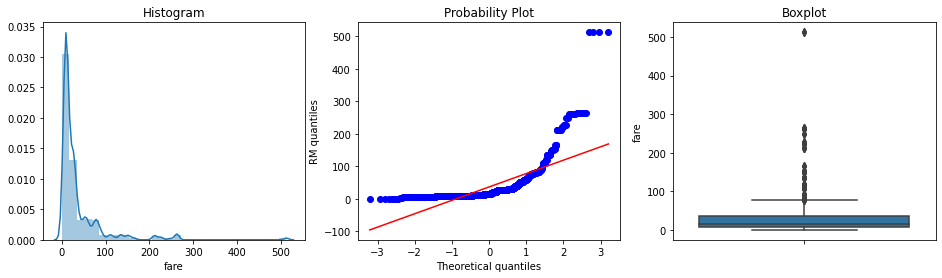

In [12]:
# variable Fare del titanic dataset
# Fare es el precio que pagó cada pasajero por su tiquete 

diagnostic_plots(titanic, 'fare')

La distribución de la variable Fare también está bastante sesgada y muestra valores inusuales a la derecha de la distribución.

En las próximas celdas, vamos a identificar los valores extremos usando la media y la desviación estándar de las variables RM y Age de los sets de datos de Boston y Titanic. Luego vamos a usar los rangos inter-cuantiles para identificar los valores extremos de las variables LSTAT y CRIM del set de datos Boston.

### Análisis de valores extremos para variables normalmente distribuidas

In [13]:
# función para encontrar los límites inferiores y superiores
# para variables normalmente distribuidas

def find_normal_boundaries(df, variable):

    # Calcular los límites para los valores extremos
    
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [14]:
# calcular los límites para RM 
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

Podemos concluir que los valores mayores a 8.4 o menores a 4.2 no son comunes para RM y por lo tanto se pueden considerar como outliers o valores atípicos.


In [15]:
# exploremos el número y el porcentage de los valores extremos para RM

print('Número total de casas: {}'.format(len(boston)))

print('Casas con mas de 8.4 habitaciones (extremo derecho de los valores atípicos): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('Casas con mas de 4.2 habitaciones (extremo izquierdo de los valores atípicos): {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% extremo derecho de los valores atípicos: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% extremo izquierdo de los valores atípicoss: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

Número total de casas: 506
Casas con mas de 8.4 habitaciones (extremo derecho de los valores atípicos): 4
Casas con mas de 4.2 habitaciones (extremo izquierdo de los valores atípicos): 4

% extremo derecho de los valores atípicos: 0.007905138339920948
% extremo izquierdo de los valores atípicoss: 0.007905138339920948


Usando el análisis de valores extremos podemos identificar los valores atípicos en ambos extremos de la distribución de RM; el porcentaje es pequeño (1.4% considerando ambos extremos).

Continuemos con la variable Age del titanic.

In [16]:
# calculemos los límites de Age en el titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.31576876619241)

El límite superior es 73 años: lo cual significa que los pasajeros mayores eran muy pocos. El límite inferior es negativo, y como edades negativas no existen, solo buscaremos valores extremos usando el límite superior.


In [17]:
# Número y porcentage de valores extremos

print('Pasajeros totales: {}'.format(len(titanic)))

print('Pasajeros mayores de  73 años: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))
print()
print('% Pasajeros mayores de  73 años: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

Pasajeros totales: 1045
Pasajeros mayores de  73 años: 3

% Pasajeros mayores de  73 años: 0.0028708133971291866


Habían tres pasajeros mayores 73 años a bordo del Titanic, que pueden considerarse como valores atípicos, ya que la mayoría de la población era mucho mas joven.


### Análisis de valores extremos para las variables sesgadas. 


In [18]:
# función para encontrar los límites inferiores y superiores
# para variables sesgadas 


def find_skewed_boundaries(df, variable, distance):

    # Calcular los límites para los valores extremos

    # distance es un argumento de la función que da la opción de 
    # estimar 1.5 o 3 veces el IQR para calcular los límites

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [19]:
# determinemos los valores extremos
# usando la regla de proximidad entre-cuantiles: IQR * 1.5

# para LSTAT en el boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [20]:
# miremos el número y porcentage de valores extremos 
# para LSTAT

# recordemos que LSTAT es el porcentage de estratos bajos de la población

print('total casas: {}'.format(len(boston)))

print('casas con LSTAT más de 32%: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% casas con LSTAT mayor que 32%: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total casas: 506
casas con LSTAT más de 32%: 7

% casas con LSTAT mayor que 32%: 0.01383399209486166


El límite superior muestra un valor de ~32%. El límite inferior es negativo, LSTAT no tiene valores negativos. Asique usaremos solamente el límite superior.

Vemos que hay 7 casas, 1.3 % del conjunto total de datos, que tienen valores extremos para LSTAT


In [21]:
# Para los valores extremos, 
# usemos la regla de proximidad  
# entre-cuantiles multiplicando por 3: IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [22]:
# miremos el número y porcentage de valores extremos 
# para CRIM

print('número total de casas: {}'.format(len(boston)))

print('casas con CRIM mayor a 14 : {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
print('% casas con CRIM mayor a 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

número total de casas: 506
casas con CRIM mayor a 14 : 30

% casas con CRIM mayor a 14: 0.05928853754940711


Cuando usamos 3 veces el rango entre-cuantil para encontrar los valores extremos, vemos que ~6% de las casas tienen una tasa alta de crimen. Para CRIM también el límite inferior es negativo, por lo tanto solo usaremos el límite superior.


# Escala de variables (Magnitud)

En los modelos lineales la escala o magnitud de las variables usadas para estimar la variable de respuesta influye en el desempeño del modelo.

**Consideraciones:**

$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

$\bullet$ $\beta$ indica un cambio en $y$ por unidad de cambio en $x$

$\bullet$ Si $x$ cambia de escala, $\beta$ cambia de valor

$\bullet$ Coeficientes de regresión dependen de la magnitud de las variables

$\bullet$ Variables con un rango mayor de valores tienden a dominar

**Nota:**

*En los modelos lineales:*

$\star$ Influye directamente en los coeficientes de la regresión.

$\star$ Variables con mayor escala dominan

*Modelos no lineales:*

$\star$ Descenso del gradiente tiende a converger más rápido cuando las variables tienen una escala similar

$\star$ SVM encuentra más rápido los vectores de soporte cuando las variables estan normalizadas

$\star$ Medidas de distancia (Euclideana): son sensibles a la escala de las variables, la magnitud de cada variable afecta el cálculo de la distancia.


**Modelos más sensibles a la escala de las variables:**

$\bullet$ Regresiones lineales y logísticas

$\bullet$ Redes Neuronales

$\bullet$ Máquinas de soporte vectorial

$\bullet$ K-vecinos cercanos (KNN)

$\bullet$ Agrupación K-means

$\bullet$ Análisis discriminante Lineal (LDA)

$\bullet$ Análisis de componentes principales (PCA)

**Modelos menos sensibles a la escala de las variables:**

$\bullet$ Árboles de clasificación y regresión

$\bullet$ Árboles de potenciación del gradiente

$\bullet$ Bosques aleatorios (Random Forest)

In [23]:
import pandas as pd
import numpy as np

# importar varios modelos de machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# para escalar las variables
from sklearn.preprocessing import MinMaxScaler

# para evaluar el desempeño y separar datos en entrenamiento y prueba
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

### Cargar los datos con las variables numéricas únicamente

In [24]:
# Cargar las variables numéricas del Titanic

data = pd.read_csv('/content/drive/My Drive/datasets/titanic.csv',
                   usecols=['pclass', 'age', 'fare', 'survived'])
data.head()

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500


In [25]:
# miremos los valores de cada una de las variables
# para darnos una idea de la mgnitud/escala de las variables
data.describe()

,pclass,survived,age,fare
count,1309.000000,1309.000000,1046.000000,1308.000000
mean,2.294882,0.381971,29.881135,33.295479
std,0.837836,0.486055,14.413500,51.758668
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,7.895800
50%,3.000000,0.000000,28.000000,14.454200
75%,3.000000,1.000000,39.000000,31.275000
max,3.000000,1.000000,80.000000,512.329200


Podemos ver que la variable fare varia entre 0 y 512, age entre 0 y 80, y class entre 0 y 3. Las variables tienen claramente diferentes escalas de magnitud.

In [27]:
# calculemos el rango

for col in ['pclass', 'age', 'fare']:
    print('rango:',col, data[col].max() - data[col].min())

rango: pclass 2
rango: age 79.8333
rango: fare 512.3292


El rango de valores que puede tomar cada una de las variables es diferente.

In [28]:
# separemos los datos en entrenamiento y prueba
# los datos del titanic contienen datos ausentes
# para este demo, los sustituiremos con 0s.

X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'age', 'fare']].fillna(0),
    data.survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

### Escalamiento de las variables

Para este demo, normalizaremos las variables entre 0 y 1, usando  el MinMaxScaler de Scikit-learn. Para aprender más acerca de este escalamiento por favor visita la página de internet de Scikit-learn [website](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

La transformación: 

X_rescaled = X - X.min() / (X.max - X.min()

y para transformar de vuelta las variables normalizadas a su escala original:

X = X_rescaled * (max - min) + min



In [29]:
# escalemos las variables entre 0 y 1.

# scaler
scaler = MinMaxScaler()

# ajustar el scaler
scaler.fit(X_train)

# re escalar los datos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#veamos los datos normalizados

print('Media: ', X_train_scaled.mean(axis=0))
print('Desviación Estandard: ', X_train_scaled.std(axis=0))
print('Valor Mínimo: ', X_train_scaled.min(axis=0))
print('Valor Máximo: ', X_train_scaled.max(axis=0))

Media:  [0.64628821 0.33048359 0.06349833]
Desviación Estandard:  [0.42105785 0.23332045 0.09250036]
Valor Mínimo:  [0. 0. 0.]
Valor Máximo:  [1. 1. 1.]


Ahora, los valores máximos de todas las variables es 1, y el valor mínimo es 0, como era de esperarse después de la normalización. Ahora todas las variables tienen una escala similar.

### Regresión Logística 

Evaluemos el efecto del escalamiento de las variables en una regresión logística.

In [31]:
# modelo construido con variables sin escalar

# Definición del Modelo
logit = LogisticRegression(
    random_state=44,
    C=1000,  # valor alto para prevenir regularización
    solver='lbfgs')

# entrenamiento del modelo 
logit.fit(X_train, y_train)

# evaluación del desempeño 
print('Segmento de entrenamiento')
pred = logit.predict_proba(X_train)
print('Regresión logística roc-auc: {}'.format(
    roc_auc_score(y_train, pred[:, 1])))
print('Segmento de prueba')
pred = logit.predict_proba(X_test)
print('Regresión logística roc-auc: {}'.format(
    roc_auc_score(y_test, pred[:, 1])))

Segmento de entrenamiento
Regresión logística roc-auc: 0.6793181006244372
Segmento de prueba
Regresión logística roc-auc: 0.7175488081411426


In [32]:
# miremos los  coeficientes
logit.coef_

array([[-0.71428242, -0.00923013,  0.00425235]])

In [33]:
# modelo construido con variables normalizadas

# Definición del Modelo
logit = LogisticRegression(
    random_state=44,
    C=1000,  # valor alto para prevenir regularización
    solver='lbfgs')

# entrenamiento del modelo con los datos re-escalados
logit.fit(X_train_scaled, y_train)

# evaluación del desempeño 
print('Segmento de entrenamiento')
pred = logit.predict_proba(X_train_scaled)
print('Regresión logística roc-auc: {}'.format(
    roc_auc_score(y_train, pred[:, 1])))
print('Segmento de prueba')
pred = logit.predict_proba(X_test_scaled)
print('Regresión logística roc-auc: {}'.format(
    roc_auc_score(y_test, pred[:, 1])))

Segmento de entrenamiento
Regresión logística roc-auc: 0.6793281640744896
Segmento de prueba
Regresión logística roc-auc: 0.7175488081411426


In [34]:
logit.coef_

array([[-1.42875872, -0.68293349,  2.17646757]])

Vemos que el desempeño de la regresión logística no cambio cuando usamos los datos normalizados ( comparando el roc-auc para el segmento de prueba y entrenamiento para modelos con y sin variables escaladas).

Sin embargo, cuando vemos los coeficientes vemos una gran diferencia en sus valores. Esto es porque la magnitud de las variables estaba afectando los coeficientes. Despues del escalamiento, todas las 3 variables tienen relativamente el mismo efecto (coeficientes) con respecto a 'survival', mientras que sin el escalamiento, estariamos más inclinados a pensar que pclass dominaba en la predicción de la tasa de supervivencia survival (el coeficiente de pclass es dos ordenes mayor que los coeficientes de las otras dos variables, cuando el modelo se entrena sobre las variables sin escalar).

### Máquinas de Soporte Vectorial SVMs

In [35]:
# Modelo con variables sin normalizar

# definición del modelo
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

#  entrenamiento del modelo
SVM_model.fit(X_train, y_train)

# evaluación del desempeño
print('Segmento de entrenamiento')
pred = SVM_model.predict_proba(X_train)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Segmento de prueba')
pred = SVM_model.predict_proba(X_test)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Segmento de entrenamiento
SVM roc-auc: 0.8823809116479402
Segmento de prueba
SVM roc-auc: 0.6617305458768874


In [36]:
# Modelo con variables normalizadas

# definición del modelo
SVM_model = SVC(random_state=44, probability=True, gamma='auto')

# entrenamiento del modelo
SVM_model.fit(X_train_scaled, y_train)

# evaluación del desempeño
print('Segmento de entrenamiento')
pred = SVM_model.predict_proba(X_train_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Segmento de prueba')
pred = SVM_model.predict_proba(X_test_scaled)
print('SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Segmento de entrenamiento
SVM roc-auc: 0.6781406769682851
Segmento de prueba
SVM roc-auc: 0.6841435761296388


El escalamiento de las variables mejoró el desempeño de SVMs. Luego de la normalización el modelo no sobre-ajusta a los datos de entrenamiento (compara el roc-auc en el set de entrenamiento para el modelo sin escalar vs el roc-auc tras la normalización). Adicionalmente, el roc-auc para el segmento de prueba se incrementó también (0.66 vs 0.68).

### Redes Neuronales 

In [37]:
# Modelo con variables sin normalizar

# definición del modelo
NN_model = MLPClassifier(random_state=44, solver='sgd')

# entrenamiento del modelo
NN_model.fit(X_train, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = NN_model.predict_proba(X_train)
print('Red Neuronal roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Segmento de prueba')
pred = NN_model.predict_proba(X_test)
print('Red Neuronal roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
Red Neuronal roc-auc: 0.6766839925731739
Segmento de prueba
Red Neuronal roc-auc: 0.7161108345777334


In [38]:
# Modelo con variables normalizadas

# definición del modelo
NN_model = MLPClassifier(random_state=44, solver='sgd')

# entrenamiento del model
NN_model.fit(X_train_scaled, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = NN_model.predict_proba(X_train_scaled)
print('Red Neuronal roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Segmento de prueba')
pred = NN_model.predict_proba(X_test_scaled)
print('Red Neuronal roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


Segmento de entrenamiento
Red Neuronal roc-auc: 0.6754939896044562
Segmento de prueba
Red Neuronal roc-auc: 0.7080913666279519


En este caso no ha habido un gran cambio.

### K-vecinos cercanos (KNN) 

In [39]:
# Modelo con variables sin normalizar

# definición del modelo
KNN = KNeighborsClassifier(n_neighbors=3)

# entrenamiento del model
KNN.fit(X_train, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = KNN.predict_proba(X_train)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Segmento de prueba')
pred = KNN.predict_proba(X_test)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
KNN roc-auc: 0.855810887646612
Segmento de prueba
KNN roc-auc: 0.6655467064874732


In [40]:
# Modelo con variables normalizadas

# definición del modelo
KNN = KNeighborsClassifier(n_neighbors=3)

# entrenamiento del model
KNN.fit(X_train_scaled, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = KNN.predict_proba(X_train_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Segmento de prueba')
pred = KNN.predict_proba(X_test_scaled)
print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
KNN roc-auc: 0.8600954015064985
Segmento de prueba
KNN roc-auc: 0.6998644986449865


Podemos ver que para KNN el escalamiento también ha mejorado el desempeño del modelo. El modelo construido con las variables normalizadas tiene una mejor generalización, ya que el roc-auc es más alto en el segmento de prueba tras escalar las variables.

Ambos modelos KNN están sobre-ajustando el segmento de entrenamiento. Deberíamos ajustar los parámetros del modelo para reducir el sobre-ajuste, pero esto está por fuera del alcance de este demo.

### Random Forests

In [41]:
# Modelo con variables sin normalizar

# definición del modelo
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# entrenamiento del model
rf.fit(X_train, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
print('Segmento de prueba')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Segmento de entrenamiento
Random Forests roc-auc: 0.9866810238554083
Segmento de prueba
Random Forests roc-auc: 0.7326751838946961


In [42]:
# Modelo con variables normalizadas

# definición del modelo
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# entrenamiento del model
rf.fit(X_train_scaled, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = rf.predict_proba(X_train_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Segmento de prueba')
pred = rf.predict_proba(X_test_scaled)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
Random Forests roc-auc: 0.9867917218059866
Segmento de prueba
Random Forests roc-auc: 0.7312510370001659


Como era de esperarse, el desempeño de Random Forest fue el mismo independientemente de la normalización de las variables. Este modelo en particular, esta sobre-ajustando el segmento de entrenamiento. Por lo tanto es necesario ajustar los parámetros del modelo para mejorar la generalización, sin embargo esto está por fuera del alcance de este demo.

In [43]:
# train adaboost on non-scaled features

# call the model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# entrenamiento del model
ada.fit(X_train, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = ada.predict_proba(X_train)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
AdaBoost roc-auc: 0.7970629821021541
Test set
AdaBoost roc-auc: 0.7473867595818815


In [44]:
# Modelo con variables normalizadas

# definición del modelo

ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# entrenamiento del model
ada.fit(X_train_scaled, y_train)

# evaluación de desempeño
print('Segmento de entrenamiento')
pred = ada.predict_proba(X_train_scaled)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test_scaled)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Segmento de entrenamiento
AdaBoost roc-auc: 0.7970629821021541
Test set
AdaBoost roc-auc: 0.7475250262706707


Como era de esperarse,  el desempeño de AdaBoost no cambio con la  normalización de las variables.